# ***SETTING THE MODEL***
*about the project:*


> > *The exercise was raised in the book "Deep Learning With Python", where we are invited to create an AI model going through each of the stages to create a model correctly. I, as "support" will use the exercises previously done in the course to guide me on the construction structure. Additional and finally I will put an image that will be useful during the development of this AI.
PS: I will document everything that is due and I will do it myself.*

# ***UNDERSTANDS THE PROJECT***
> The data set used in this project comes from Kaggle. Otherwise, if you want to understand how I built the model, see the other file.
 [Kaggle](https://kaggle.com).

In [ ]:
import pandas as pd

def read_file(traincsv, testcsv):
  f_train = pd.read_csv(traincsv)
  f_test = pd.read_csv(testcsv)
  return f_train, f_test



train_data, test_data = read_file('train.csv', 'test.csv')

# ***IMPORTANT QUESTIONS RAISED:***


***Seeing the data a little clearer, we can ask ourselves the following questions:***


* What will be the input data?
* What are we trying to predict?


Responding to them we can say that:
   - Possibly they are ALL the data of the passengers, such as room, departure planet, departure planet...
   - If the passenger was transported to another dimension. (Column transported)



***After analyzing these questions, we would have to answer the following important question:***

   - What kind of problem are we facing?

  

answering the question, we can say that:

   - We are surely facing a binary classification problem: Transported or not transported.

Now we need to choose a method to validate the information. For this purpose we want to obtain the precision on the test data.

***- CHOOSE AN ASSESSMENT METHOD:***

In this case, since we have enough data to train and validate, we will use a reserve for testing.


***- PREPARING OUR DATA:***

In [ ]:
import numpy as np

# Datos de entrenamiento

train_data = train_data.drop(['HomePlanet', 'Cabin', 'PassengerId', 'Destination', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name'], axis = 1)
train_data['CryoSleep'] = train_data['CryoSleep'].fillna(False)
train_data['Age'] = train_data['Age'].fillna(False)



# Entrenamiento
train_labels = tuple(train_data['Transported'].apply(int))[:8000]

train_data = train_data.drop(columns = 'Transported')

train_data['CryoSleep'] = train_data['CryoSleep'].astype(int)

train_data = train_data.values.tolist()

train_data = train_data[:8000]





# Test
# test_labels = tuple(test_data['Transported'].apply(int))[:8000]
# test_data = test_data.drop(columns = 'Transported')


test_data['CryoSleep'] = test_data['CryoSleep'].fillna(False)
test_data['Age'] = test_data['Age'].fillna(False)


test_data['CryoSleep'] = test_data['CryoSleep'].astype(int)
test_data = test_data.drop(['HomePlanet', 'Cabin', 'PassengerId', 'Destination', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name'], axis = 1)

test_data = test_data.values.tolist()

test_data = test_data[:8000]






# print(test_data)
# print(test_labels)


# print(len(test_data))

***- CODING A "DECENT" MODEL:***







> The next step is to create a model that gets decent accuracy for our problem. Then we'll refine it.

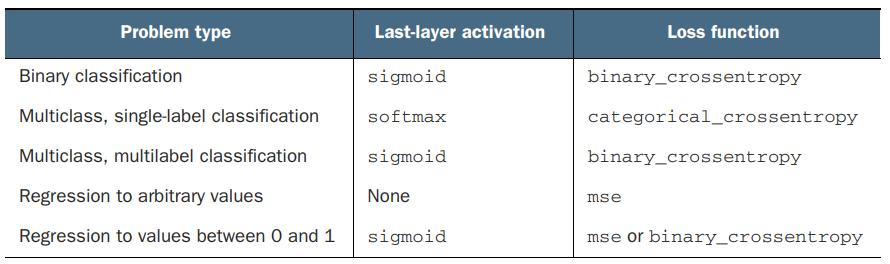

In [ ]:
from keras import models, layers


def building_model():
  model = models.Sequential()

  model.add(layers.Dense(16, activation = 'relu', input_shape = (2,)))
  model.add(layers.Dense(16, activation = 'relu'))
  model.add(layers.Dense(1, activation = 'sigmoid'))


  return model

In [ ]:
# Entrenamiento
x_train = np.array((train_data[:4000])) # Para entrenamiento.
x_labels = np.array((train_labels[:4000]))


# Validación.
y_train = np.array(train_data[4000:8000])
y_labels = np.array(train_labels[4000:8000])



# Prueba final!
test_data = test_data[:4000]

***- Modelo (básico):***

In [ ]:
model = building_model()


model.compile(optimizer = 'rmsprop',
              loss = 'mse',
              metrics = ['acc'])
epochs_var = 15

fitModel = model.fit(x_train, x_labels,
                     epochs = epochs_var,
                     batch_size = 512,
                     validation_data = (y_train, y_labels))



print(fitModel.history.keys())

Epoch 1/15
8/8 [==============================] - 1s 27ms/step - loss: 0.3913 - acc: 0.5370 - val_loss: 0.2493 - val_acc: 0.5307
Epoch 2/15
8/8 [==============================] - 0s 9ms/step - loss: 0.2457 - acc: 0.5785 - val_loss: 0.2556 - val_acc: 0.5085
Epoch 3/15
8/8 [==============================] - 0s 7ms/step - loss: 0.2465 - acc: 0.5523 - val_loss: 0.2459 - val_acc: 0.5673
Epoch 4/15
8/8 [==============================] - 0s 7ms/step - loss: 0.2468 - acc: 0.5465 - val_loss: 0.2444 - val_acc: 0.5875
Epoch 5/15
8/8 [==============================] - 0s 8ms/step - loss: 0.2458 - acc: 0.5552 - val_loss: 0.2408 - val_acc: 0.6615
Epoch 6/15
8/8 [==============================] - 0s 8ms/step - loss: 0.2422 - acc: 0.5928 - val_loss: 0.2406 - val_acc: 0.6700
Epoch 7/15
8/8 [==============================] - 0s 9ms/step - loss: 0.2429 - acc: 0.5810 - val_loss: 0.2538 - val_acc: 0.5128
Epoch 8/15
8/8 [==============================] - 0s 9ms/step - loss: 0.2413 - acc: 0.5953 - val_loss: 

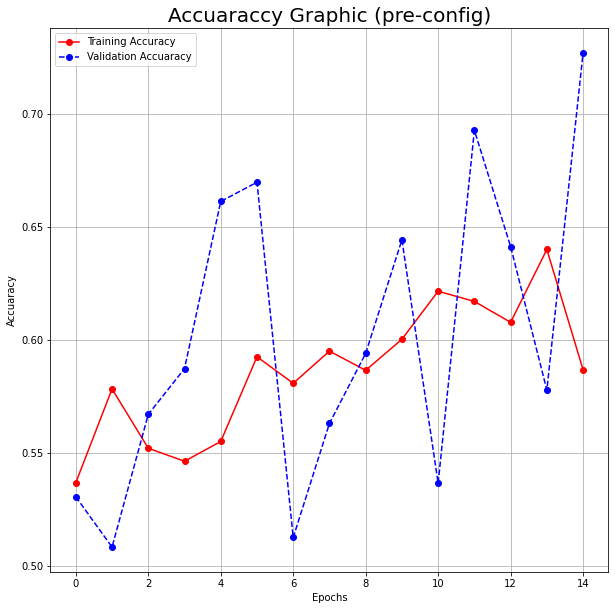

In [ ]:
import matplotlib.pyplot as plt



plt.figure(figsize = (10, 10))
plt.plot(range(0, len(fitModel.history['acc'])), fitModel.history['acc'], 'r-o', label = 'Training Accuracy')
plt.plot(range(0, len(fitModel.history['val_acc'])), fitModel.history['val_acc'], 'b--o', label = 'Validation Accuaracy')
plt.xlabel('Epochs')
plt.ylabel('Accuaracy')
plt.grid()
plt.title('Accuaraccy Graphic (pre-config)', fontsize = 20)
plt.legend()

plt.show()

***- MODEL THAT EXCEEDS A CONSIDERABLE LINE***

So far, I have developed a model that exceeds the acceptable line to say that it works, this exceeds and reaches approximately 75% in the 7th time. So far we have achieved statistical power (a considerable goal that is expected to be achieved initially when creating a neural network, and then perfected)